In [1]:
import preprocessor as p
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
import pandas as pd
import re

In [2]:
data = pd.read_csv('combined_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      525 non-null    int64 
 1   created_at               525 non-null    object
 2   favorite_count           525 non-null    int64 
 3   full_text                525 non-null    object
 4   id_str                   525 non-null    int64 
 5   image_url                196 non-null    object
 6   in_reply_to_screen_name  22 non-null     object
 7   lang                     525 non-null    object
 8   location                 420 non-null    object
 9   quote_count              525 non-null    int64 
 10  reply_count              525 non-null    int64 
 11  retweet_count            525 non-null    int64 
 12  tweet_url                525 non-null    object
 13  user_id_str              525 non-null    int64 
 14  username                 525 non-null    o

In [3]:
data = data[['username','full_text']]
data.sample(n=5)

,username,full_text
301,kompascom,Investasi Microsoft senilai 1 7 miliar dollar ...
312,tempodotco,Microsoft Luncurkan AI Founders Club di Indone...
504,bernamadotcom,RM150 000 untuk Pertis Perkam beli mesin pembe...
422,UMonline,Merekayasa masa depan Malaysia dinamik bersama...
113,cnbcindonesia,Urgensi Memaksimalkan Potensi Kecerdasan Buata...


In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Linn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Linn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('indonesian'))

In [7]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text) 
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)


data['tweet_clean'] = data['full_text'].apply(clean_text)
data = data.drop_duplicates()

In [8]:
data.head()

,username,full_text,tweet_clean
0,aimr0d,Kecerdasan buatan ketika dipertemukan kedungua...,kecerdasan buatan dipertemukan kedunguan alami
1,blue_berets7,USA Elon Musk: Chip Neuralink Antichrist akan ...,usa elon musk chip neuralink antichrist muncul...
2,JapenPahang,Kapsul JAPENTV | AI Untuk Rakyat AI Untuk Raky...,kapsul japentv ai rakyat ai rakyat program pem...
3,andricuanterus,Bittensor $TAO Fundamental INTRO: Bittensor ($...,bittensor tao fundament intro bittensor tao pr...
4,JPenerangan,Kapsul JAPENTV | AI Untuk Rakyat AI Untuk Raky...,kapsul japentv ai rakyat ai rakyat program pem...


In [9]:
from deep_translator import GoogleTranslator
def translate_text(text):
    translator = GoogleTranslator(source='id', target='en')
    return translator.translate(text)

data['english_text'] = data['tweet_clean'].apply(translate_text)

In [10]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['label'] = data['english_text'].apply(get_sentiment)

In [11]:
data.head()

,username,full_text,tweet_clean,english_text,label
0,aimr0d,Kecerdasan buatan ketika dipertemukan kedungua...,kecerdasan buatan dipertemukan kedunguan alami,artificial intelligence meets natural stupidity,negative
1,blue_berets7,USA Elon Musk: Chip Neuralink Antichrist akan ...,usa elon musk chip neuralink antichrist muncul...,usa elon musk antichrist neuralink chip emerge...,negative
2,JapenPahang,Kapsul JAPENTV | AI Untuk Rakyat AI Untuk Raky...,kapsul japentv ai rakyat ai rakyat program pem...,capsule japentv ai rakyat ai rakyat online sel...,negative
3,andricuanterus,Bittensor $TAO Fundamental INTRO: Bittensor ($...,bittensor tao fundament intro bittensor tao pr...,bittensor tao fundament intro bittensor tao de...,negative
4,JPenerangan,Kapsul JAPENTV | AI Untuk Rakyat AI Untuk Raky...,kapsul japentv ai rakyat ai rakyat program pem...,japentv capsule AI people AI people online ind...,negative


Cek Jumlah Data tiap Label

In [12]:
jumlah_sampel_per_kelas = data['label'].value_counts()
jumlah_sampel_per_kelas


label
negative    205
neutral     182
positive    135
Name: count, dtype: int64

Cek Proporsi label / tiap kelas

In [13]:
import pandas as pd

# Distribusi label yang Anda berikan
jumlah_sampel_per_kelas = data['label'].value_counts()

# Mengonversi ke DataFrame untuk kemudahan manipulasi
label_df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['count'])

# Menghitung total jumlah contoh
total_count = label_df['count'].sum()

# Menghitung proporsi setiap kelas
label_df['proportion'] = label_df['count'] / total_count

# Menampilkan proporsi
print(label_df)


          count  proportion
negative    205    0.392720
neutral     182    0.348659
positive    135    0.258621


Plotting Jumlah Data Tiap Label

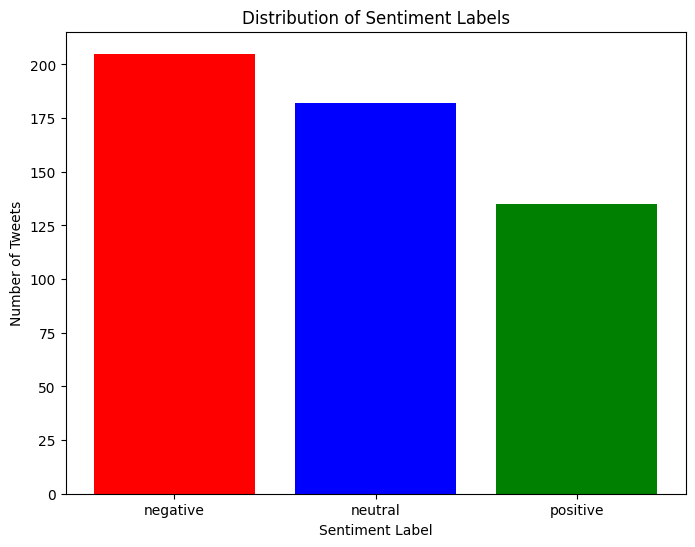

In [22]:
import matplotlib.pyplot as plt


label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=['red', 'blue', 'green'])
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [14]:
data.to_csv('final-preprocessing.csv')

In [15]:
df = data[['tweet_clean','label']]
df.head()

,tweet_clean,label
0,kecerdasan buatan dipertemukan kedunguan alami,negative
1,usa elon musk chip neuralink antichrist muncul...,negative
2,kapsul japentv ai rakyat ai rakyat program pem...,negative
3,bittensor tao fundament intro bittensor tao pr...,negative
4,kapsul japentv ai rakyat ai rakyat program pem...,negative


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Memisahkan data menjadi fitur dan label
X = df['tweet_clean']
y = df['label']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words=None)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Memprediksi pada set pengujian
y_pred = model.predict(X_test_tfidf)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6285714285714286
Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.88      0.73        49
     neutral       0.68      0.51      0.58        37
    positive       0.50      0.21      0.30        19

    accuracy                           0.63       105
   macro avg       0.60      0.53      0.54       105
weighted avg       0.62      0.63      0.60       105



In [20]:
#Saving Model
import joblib
joblib.dump(model,open('nbmodel.pkl',"wb"))
joblib.dump(tfidf, open('tfidf_vect.pkl',"wb"))